#   Lesson 3:  $k$-nearest neighbors


---

### Contents

-   [Introduction](#1)
-   [Training data generation](#2)
-   [Binary data visualization](#3)
-   [Test data generation](#4)
-   [Apply KNN approach for binary data classification](#5)
-   [Contributors](#6)


---

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

##  [Introduction](#1)

[$k$-nearest neighbors](https://infogalactic.com/info/K-nearest_neighbors_algorithm) is an algorithm which _trains_ on a data set and then makes predictions based on its _supervised learning_.  Specifically, the $k$ closest training examples are used to predict the classification of new examples.

KNN possesses excellent scaling properties, which is one reason it is popular.  The accuracy tends to increase as the data set size increases.


---

##  [Training data generation](#2)

Instead of loading a data set, in this case we will generate a random data set suitable for training.

In [2]:
csize = 10  # create 10 center points for each group
s = 1       # st dev for points (distributed from center)

m0 = npr.randn( csize,2 )
m0[ :,0 ] += 1
m1 = npr.randn( csize,2 )
m1[ :,1 ] += 1

# Generature training points
n = 100     # number of training points for each group
id0 = npr.choice( range( 0,csize ),n,replace=True )
id1 = npr.choice( range( 0,csize ),n,replace=True )
s = np.sqrt( 1/5 )  # st dev for generating x

traindata_blue = np.zeros( ( n,2 ) )
traindata_red  = np.zeros( ( n,2 ) )
for i in range( n ):
    traindata_blue[ i,: ] = npr.randn( 1,2 ) * s + m0[ id0[ i ],: ]
    traindata_red[ i,: ]  = npr.randn( 1,2 ) * s + m1[ id1[ i ],: ]

traindata = np.concatenate( ( traindata_blue,traindata_red ) )
y = np.concatenate( ( np.zeros( ( n,1 ) ),np.ones( ( n,1 ) ) ) )
y_train = y[ : ]

---

##  [Binary data visualization](#3)

Now we need to pause and see what these training data _look_ like.

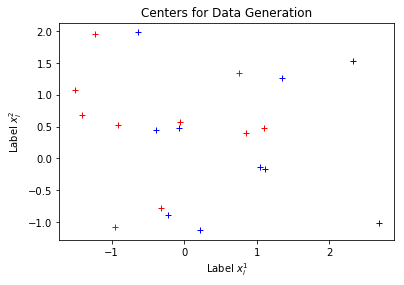

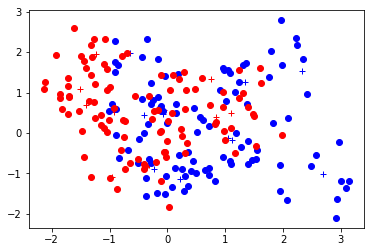

In [3]:
plt.plot( m0[:,0],m0[:,1],'b+' )
plt.plot( m1[:,0],m1[:,1],'r+' )
plt.xlabel( r'Label $x_i^1$' )
plt.ylabel( r'Label $x_i^2$' )
plt.title( 'Centers for Data Generation' );
plt.show()

plt.plot( m0[:,0],m0[:,1],'b+' )
plt.plot( m1[:,0],m1[:,1],'r+' )
plt.plot( traindata_blue[:,0],traindata_blue[:,1],'bo' )
plt.plot( traindata_red[:,0],traindata_red[:,1],'ro' )
plt.show()

---

##  [Test data generation](#4)


In [4]:
N = 5000
id0 = npr.choice( range( 0,csize ),N )
id1 = npr.choice( range( 0,csize ),N )

testdata_blue = np.zeros( ( N,2 ) )
testdata_red  = np.zeros( ( N,2 ) )
for i in range( N ):
    testdata_blue[ i,: ] = npr.randn( 1,2 ) * s + m0[ id0[ i ],: ]
    testdata_red[ i,: ]  = npr.randn( 1,2 ) * s + m1[ id1[ i ],: ]

testdata = np.concatenate( ( testdata_blue,testdata_red ) )
y = np.concatenate( ( np.zeros( ( N,1 ) ),np.ones( ( N,1 ) ) ) )
y_test = y[ : ]

---

##  [Apply KNN approach for binary data classification](#5)

We'll need a new library, the major machine learning library in Python, `scikit-learn`.

In [5]:
from sklearn import neighbors

Next, we'll vary the number $k$ of nearest neighbors in order to compare results.  We can use this to identify the model which best approximates our data.

In [6]:
myk = [ 1,3,5,7,11,21,31,45,69,101,151 ]
myk = sorted( myk,reverse=True )
m = len( myk )

In [7]:
cv_err = np.zeros( ( m,1 ) )
id = npr.choice( range( 0,2*n ),2*n,replace=False )
fold = range( 0,201,40 )

In [8]:
for i in range( 5 ):
    for j in range( m ):
        # Set up training and target data sets.
        ith = id[ fold[ i ]:fold[ i+1 ]-1 ] # rows in i-th fold
        op_ith = np.setdiff1d( id,ith )     # rows in id but not i-th fold

        # Classify them to train the model.
        knn = neighbors.KNeighborsClassifier( n_neighbors=myk[ j ] )
        knn.fit( traindata[ op_ith,: ],y_train[ op_ith,: ] )
        tmp = knn.predict( traindata[ ith,: ] )

        # Calculate error for each k.
        cv_err[ j ] += ( tmp != y_train[ ith ].T ).sum( axis=1 )[ 0 ]

/home/davis68/Code/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [9]:
# Select the most successful number of nearest neighbors.
min_value = min( cv_err )
min_index = cv_err.argmin()
k_star = myk[ min_index ]

In [10]:
for i,j in enumerate( cv_err ):
    print( 'k=%i has error rate of %i.'%( myk[ i ],j ) )

k=151 has error rate of 74.
k=101 has error rate of 63.
k=69 has error rate of 74.
k=45 has error rate of 71.
k=31 has error rate of 76.
k=21 has error rate of 67.
k=11 has error rate of 64.
k=7 has error rate of 61.
k=5 has error rate of 65.
k=3 has error rate of 61.
k=1 has error rate of 64.


Then go ahead and build the predictive model.  This requires explicitly training the model using the parameters just determined.

In [11]:
# Build a predictive model.
knn_pred = neighbors.KNeighborsClassifier( n_neighbors=myk[ min_index ] )
knn_pred.fit( traindata,y_train )
y_test_pred = knn_pred.predict( testdata )
test_err = sum( y_test.T != y_test_pred ).sum( axis=0 ) / ( 2*n )

/home/davis68/Code/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


Plot the fitted results, as well as a grid of the underlying space so we can visualize the KNN behavior.

/home/davis68/Code/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


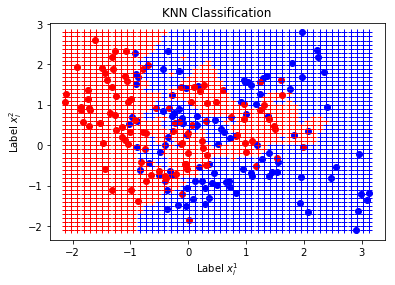

In [12]:
# Plot the predictive model results.
fig,ax = plt.subplots()
for i in range( len( y_train ) ):
    if y_train[ i ] == 0:
        ax.plot( traindata[ i,0 ],traindata[ i,1 ],'bo' )
    else:
        ax.plot( traindata[ i,0 ],traindata[ i,1 ],'ro' )

X,Y = np.meshgrid( np.linspace( min( traindata[ :,0 ] ),max( traindata[ :,0 ] ) ),np.linspace( min( traindata[ :,1 ] ),max( traindata[ :,1 ] ) ) )
X = X.ravel()
X.shape = 2500,1
Y = Y.ravel()
Y.shape = 2500,1
knn_final = neighbors.KNeighborsClassifier( n_neighbors=k_star )
knn_final.fit( traindata,y_train )
C = knn_final.predict( np.concatenate( ( X,Y ),axis=1 ) )

for i in range( len( C ) ):
    if C[ i ] == 0:
        ax.plot( X[ i ],Y[ i ],'b+' )
    else:
        ax.plot( X[ i ],Y[ i ],'r+' )
plt.xlabel( r'Label $x_i^1$' )
plt.ylabel( r'Label $x_i^2$' )
plt.title( 'KNN Classification' )
plt.show()

-   What are the potential pitfalls of a method like this?  Where does it seem to be strong?


---

##  [Contributors](#6)

These lessons were developed by Erhu Du, Jane Lee, and Neal Davis for Computational Science and Engineering at the University of Illinois.  Development was supported by a grant from MathWorks, Inc.